<a href="https://colab.research.google.com/github/ishita164/DataAnalytics/blob/Experiments/2019130039_Part(III)_OEIT6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISE3: Correlation and Regression

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as stats
import statsmodels.api as sm

data = pd.read_csv('2019.csv')
data.info()
len(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


156

In [ ]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
data.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [ ]:
data.shape

(156, 9)

In [ ]:
data.isnull()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
#any: if any NA values are present, drop that label
data.dropna(how = 'any').shape

(156, 9)

In [ ]:
#all: if all values ate NA, drop that label
data.dropna(how = 'all').shape

(156, 9)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
corelation = data.corr()

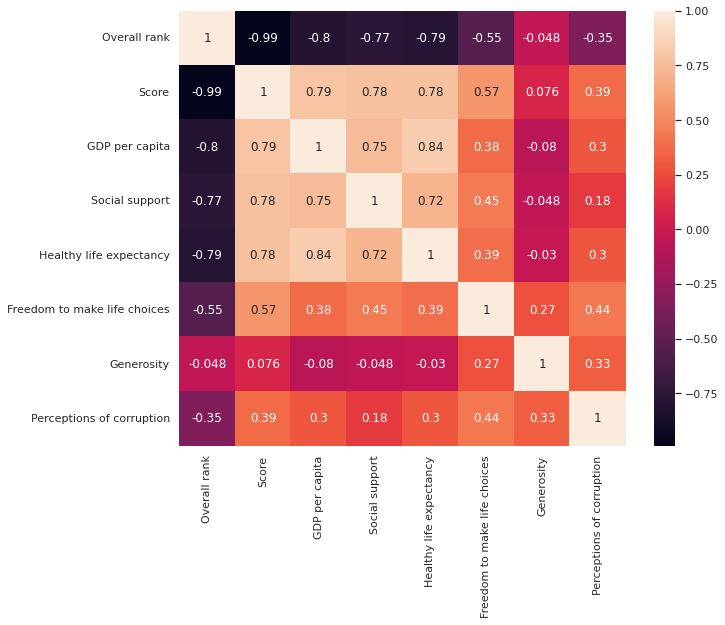

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

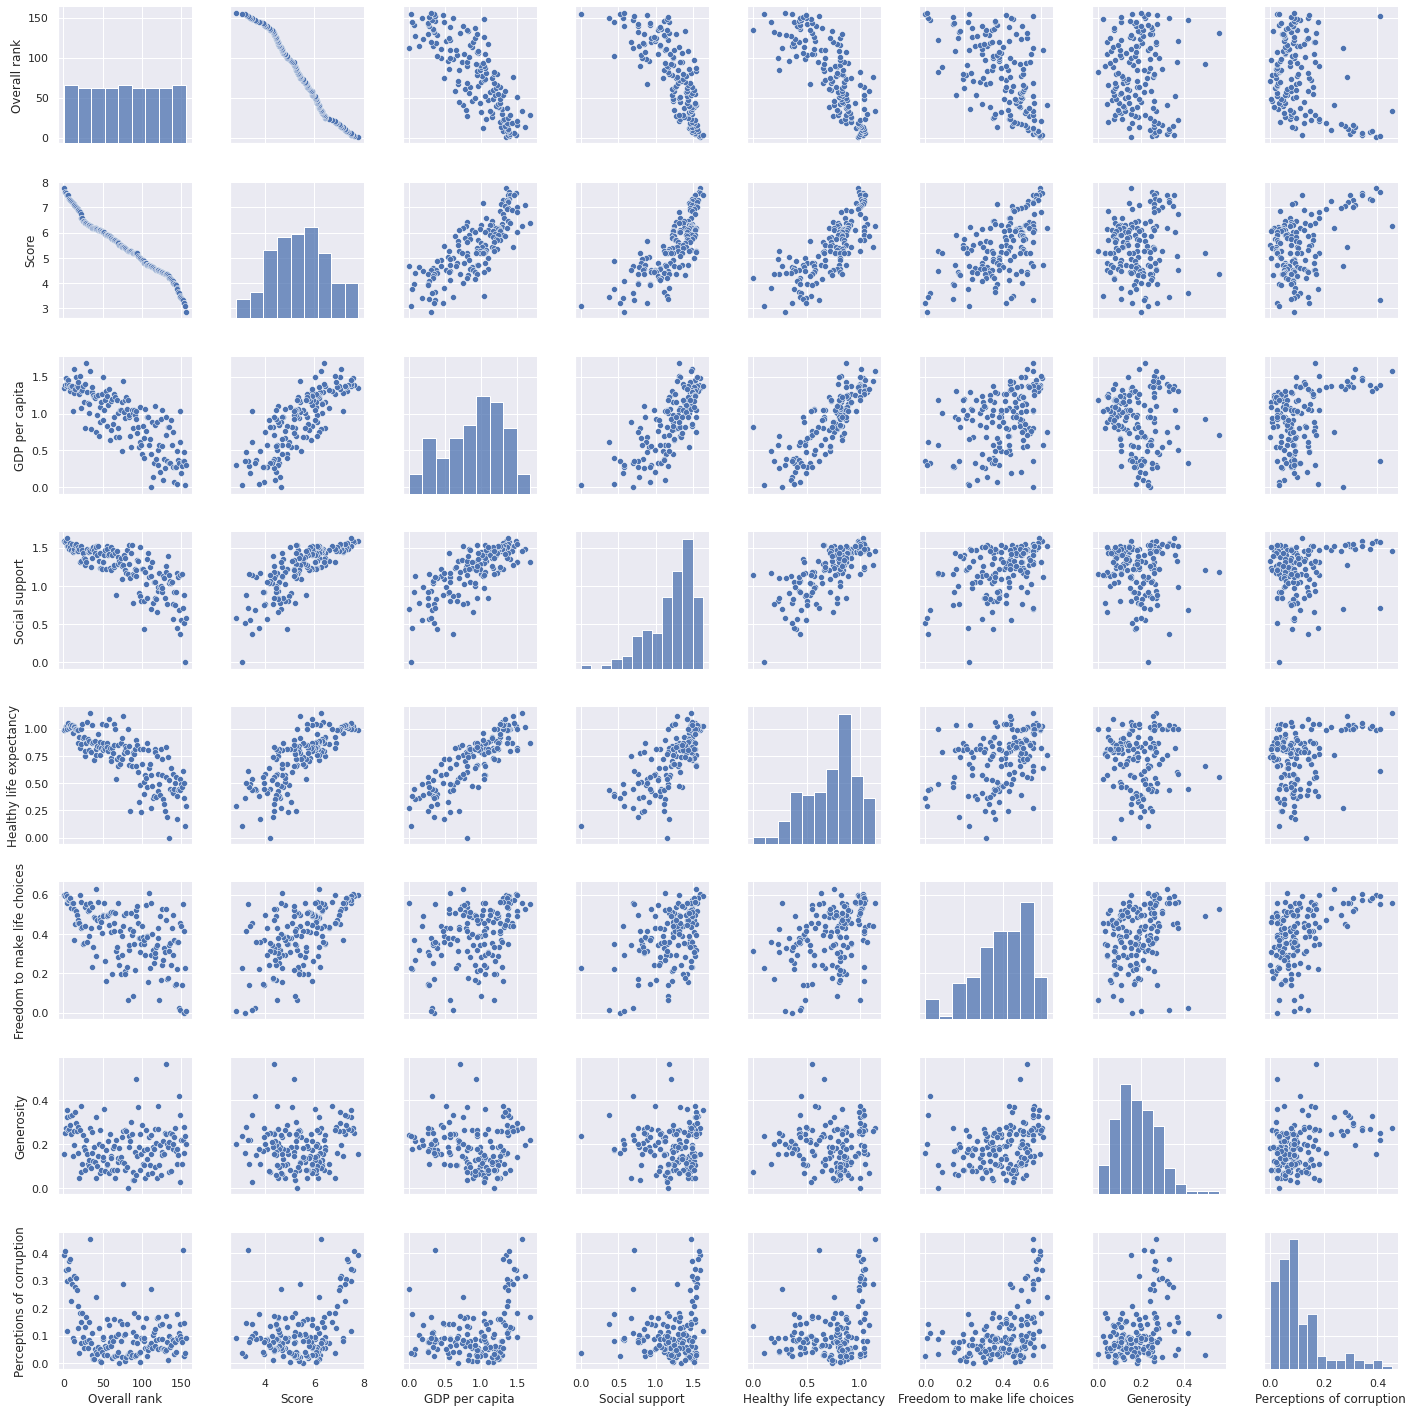

In [ ]:
sns.pairplot(data)

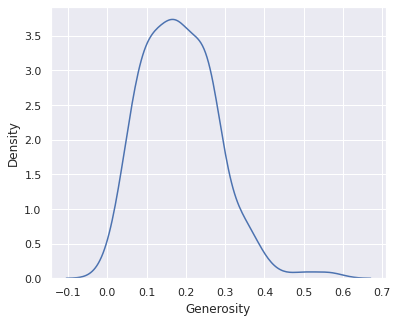

In [ ]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.kdeplot(data.Generosity)

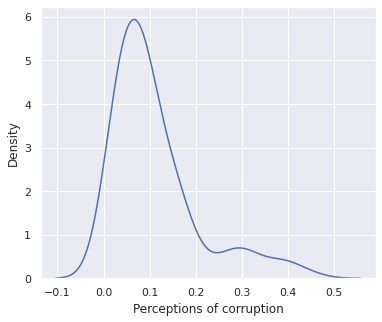

In [ ]:
sns.kdeplot(data['Perceptions of corruption'])

In [ ]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Score'] # independent variable

In [ ]:
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm.predict(x)

0      -16.315715
1       -9.531418
2       -7.684805
3       -5.276179
4       -5.035316
          ...    
151    161.721886
152    165.856694
153    166.980720
154    171.797971
155    181.031038
Length: 156, dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6946.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          5.04e-130
Time:                        09:07:51   Log-Likelihood:                -516.49
No. Observations:                 156   AIC:                             1037.
Df Residuals:                     154   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        295.5612      2.659    111.171      0.000     290.309     300.813
Score        -40.1438      0.482    -83.346      0.000     -41.095     -39.192
==============================================================================
Omnibus:                        6.646   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.268
Skew:                          -0.437   Prob(JB):                       0.0435
Kurtosis:                       3.446   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = -40.1438 * data['Score'] + 295.5612

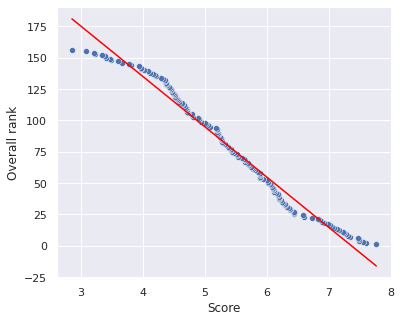

In [ ]:
# plotting the data points
sns.scatterplot(x=data['Score'], y=y)
#plotting the line
sns.lineplot(x=data['Score'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Score'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -1.000
Samples are correlated (reject H0) p=0.000


As the R-squared is greater than 0.7 which is showing a high level of correlation.
Also, there is a statistically significant difference in Overall rank and Score, t: -83.346, the null hypothesis is rejected,p: 0.0.
Hence Samples are correlated.


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['GDP per capita'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     277.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.79e-36
Time:                        09:07:52   Log-Likelihood:                -734.94
No. Observations:                 156   AIC:                             1474.
Df Residuals:                     154   BIC:                             1480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            160.8149      5.396     29.803      0.000     150.155     171.474
GDP per capita   -90.9409      5.459    -16.659      0.000    -101.725     -80.157
==============================================================================
Omnibus:                        1.573   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.654
Skew:                           0.223   Prob(JB):                        0.437
Kurtosis:                       2.766   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

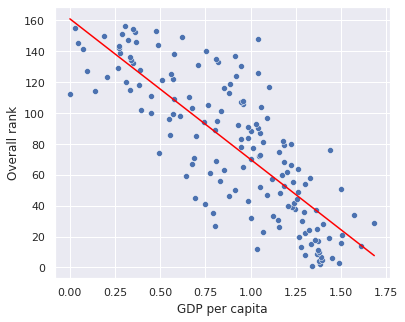

In [ ]:
y_pred = -90.9409 * data['GDP per capita'] + 160.8149
# plotting the data points
sns.scatterplot(x=data['GDP per capita'], y=y)
#plotting the line
sns.lineplot(x=data['GDP per capita'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['GDP per capita'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.814
Samples are correlated (reject H0) p=0.000


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and GDP per capita, t: -16.65, the null hypothesis is rejected,p: 0.0.
Hence Samples are correlated. 


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Social support'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     220.7
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.53e-31
Time:                        09:07:53   Log-Likelihood:                -745.95
No. Observations:                 156   AIC:                             1496.
Df Residuals:                     154   BIC:                             1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            218.5847      9.712     22.506      0.000     199.398     237.771
Social support  -115.8860      7.801    -14.856      0.000    -131.296    -100.476
==============================================================================
Omnibus:                        4.799   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.118
Skew:                           0.309   Prob(JB):                        0.128
Kurtosis:                       2.499   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

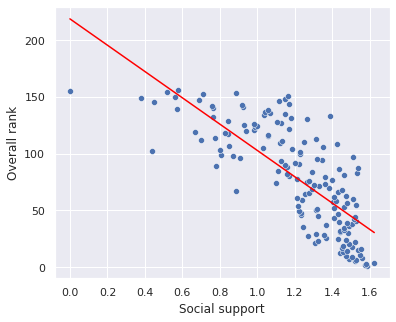

In [ ]:
y_pred = -115.8860 * data['Social support'] + 218.5847
# plotting the data points
sns.scatterplot(x=data['Social support'], y=y)
#plotting the line
sns.lineplot(x=data['Social support'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Social support'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.816
Samples are correlated (reject H0) p=0.000


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and Social support, t:-14.856, the null hypothesis is rejected,p: 0.0.
Hence Samples are correlated. 


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Healthy life expectancy'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     251.3
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           3.56e-34
Time:                        09:07:53   Log-Likelihood:                -739.83
No. Observations:                 156   AIC:                             1484.
Df Residuals:                     154   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     185.0538      7.084     26.122      0.000     171.059     199.049
Healthy life expectancy  -146.9214      9.268    -15.852      0.000    -165.231    -128.612
==============================================================================
Omnibus:                        9.928   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                5.463
Skew:                           0.266   Prob(JB):                       0.0651
Kurtosis:                       2.254   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

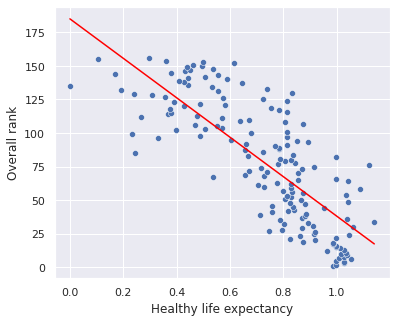

In [ ]:
y_pred = -146.9214 * data['Healthy life expectancy'] + 	185.0538
# plotting the data points
sns.scatterplot(x=data['Healthy life expectancy'], y=y)
#plotting the line
sns.lineplot(x=data['Healthy life expectancy'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Healthy life expectancy'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.807
Samples are correlated (reject H0) p=0.000


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and Healthy life expectancy, t: 15.85, the null hypothesis is rejected,p: 0.0.
Hence Samples are correlated. 


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Freedom to make life choices'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     65.62
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.56e-13
Time:                        09:07:54   Log-Likelihood:                -787.62
No. Observations:                 156   AIC:                             1579.
Df Residuals:                     154   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          146.1550      8.888     16.445      0.000     128.598     163.712
Freedom to make life choices  -172.3384     21.275     -8.100      0.000    -214.367    -130.309
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.315
Skew:                           0.326   Prob(JB):                       0.0701
Kurtosis:                       2.374   Cond. No.                         8.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

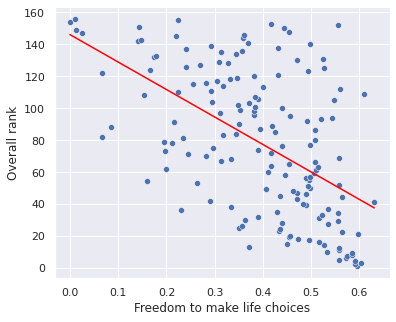

In [ ]:
y_pred = -172.3384 * data['Freedom to make life choices'] + 146.1550
# plotting the data points
sns.scatterplot(x=data['Freedom to make life choices'], y=y)
#plotting the line
sns.lineplot(x=data['Freedom to make life choices'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Freedom to make life choices'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.552
Samples are correlated (reject H0) p=0.000


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and Freedom to make life choices, t: 8.1, the null hypothesis is rejected,p: 0.0.
Hence Samples are correlated.


(array([ 9., 34., 29., 32., 34.,  9.,  6.,  1.,  1.,  1.]),
 array([0.    , 0.0566, 0.1132, 0.1698, 0.2264, 0.283 , 0.3396, 0.3962,
        0.4528, 0.5094, 0.566 ]),
 <a list of 10 Patch objects>)

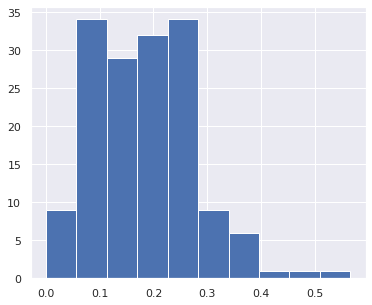

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv('2019.csv')
plt.hist(data['Generosity'])


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Generosity'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3555
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.552
Time:                        09:07:56   Log-Likelihood:                -815.13
No. Observations:                 156   AIC:                             1634.
Df Residuals:                     154   BIC:                             1640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7075      7.933     10.426      0.000      67.036      98.379
Generosity   -22.7620     38.175     -0.596      0.552     -98.176      52.652
==============================================================================
Omnibus:                       70.942   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.671
Skew:                           0.039   Prob(JB):                      0.00794
Kurtosis:                       1.783   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

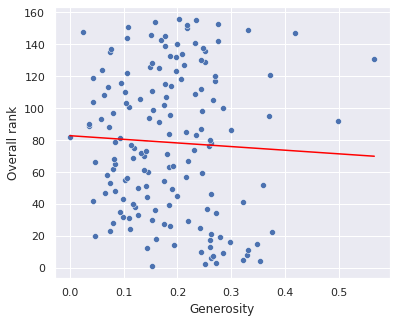

In [ ]:
y_pred = -22.7620 * data['Generosity'] + 	82.7075
# plotting the data points
sns.scatterplot(x=data['Generosity'], y=y)
#plotting the line
sns.lineplot(x=data['Generosity'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Generosity'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.070
Samples are uncorrelated (fail to reject H0) p=0.382


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and 'Generosity’, t: -0.596, the null hypothesis is accepted,p: 0.0.
Hence Samples are uncorrelated. 


(array([ 1.,  0.,  0.,  3., 11., 32., 43., 50., 13.,  3.]),
 array([0.        , 0.08271904, 0.16543808, 0.24815712, 0.33087615,
        0.41359519, 0.49631423, 0.57903327, 0.66175231, 0.74447135,
        0.82719038]),
 <a list of 10 Patch objects>)

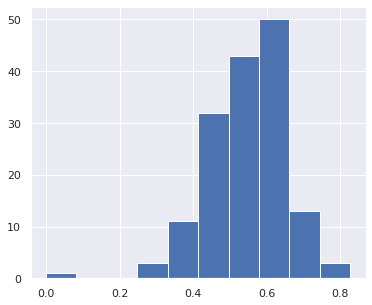

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv('2019.csv')
data['Generosity'] =(data['Generosity'])**(1/3)
plt.hist(data['Generosity'])


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Generosity'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4321
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.512
Time:                        09:07:57   Log-Likelihood:                -815.09
No. Observations:                 156   AIC:                             1634.
Df Residuals:                     154   BIC:                             1640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.4751     18.574      4.871      0.000      53.783     127.167
Generosity   -21.7771     33.128     -0.657      0.512     -87.221      43.667
==============================================================================
Omnibus:                       70.523   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.662
Skew:                           0.043   Prob(JB):                      0.00798
Kurtosis:                       1.784   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

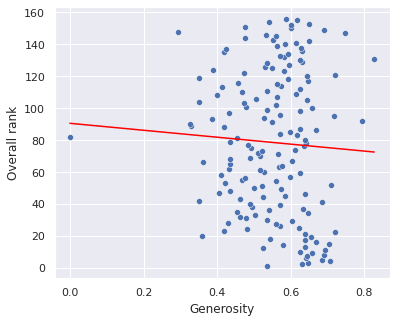

In [ ]:
y_pred = -21.7771 * data['Generosity'] + 	90.4751
# plotting the data points
sns.scatterplot(x=data['Generosity'], y=y)
#plotting the line
sns.lineplot(x=data['Generosity'],y=y_pred, color='red')

After performing log transformation, the R-squared:	0.003, Hence Samples are uncorrelated.

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Generosity'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.070
Samples are uncorrelated (fail to reject H0) p=0.382


In [ ]:
y = data['Overall rank'] # dependent variable
x = data['Perceptions of corruption'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.77
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           6.62e-06
Time:                        09:07:58   Log-Likelihood:                -804.99
No. Observations:                 156   AIC:                             1614.
Df Residuals:                     154   BIC:                             1620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        97.1026      5.237     18.540      0.000      86.756     107.449
Perceptions of corruption  -168.1928     36.044     -4.666      0.000    -239.398     -96.987
==============================================================================
Omnibus:                       17.843   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.548
Skew:                           0.303   Prob(JB):                       0.0230
Kurtosis:                       2.109   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

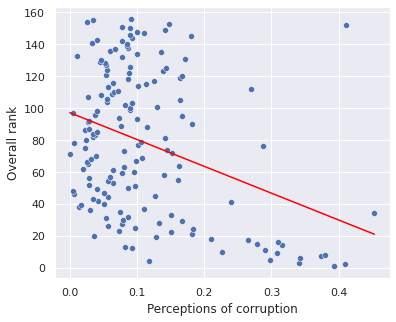

In [ ]:
y_pred = -168.1928 * data['Perceptions of corruption'] + 	97.1026
# plotting the data points
sns.scatterplot(x=data['Perceptions of corruption'], y=y)
#plotting the line
sns.lineplot(x=data['Perceptions of corruption'],y=y_pred, color='red')

In [ ]:
coef, p = spearmanr(data['Overall rank'], data['Perceptions of corruption'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.217
Samples are correlated (reject H0) p=0.006


As the R-squared is less than 0.7 which is showing a low level of correlation.
Also, there is a statistically significant difference in Overall rank and Perceptions of corruption, t: -4.666, the null hypothesis is accepted,p: 0.0.
Hence Samples are correlated.


In [ ]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.534848,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.631636,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.647127,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.707404,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.685412,0.298


In [ ]:
data.drop(data.columns[[1]], axis = 1, inplace = True)


In [ ]:
less3 = data[(data['Score'] < 3)]
bet34 = data[(3 < data['Score'] ) & ( data['Score'] <= 4)]
bet45 = data[(4 < data['Score'] ) & ( data['Score'] <= 5)]
bet56 = data[(5 < data['Score'] ) & ( data['Score'] <= 6)]
bet67 = data[(6 < data['Score'] ) & ( data['Score'] <= 7)]
bet78 = data[(7 < data['Score'] ) & ( data['Score'] <= 8)]


In [ ]:
stats.f_oneway(less3,bet34,bet45,bet56,bet67,bet78)

F_onewayResult(statistic=array([477.06042635, 521.31637315,  53.22701098,  48.30107394,
        48.21719431,  15.65863679,   3.71627799,  20.51223943]), pvalue=array([3.67402807e-90, 6.96288044e-93, 1.50526546e-31, 1.38621043e-29,
       1.50077545e-29, 2.18148143e-12, 3.36066739e-03, 1.42712898e-15]))

y = data['Overall rank'] # dependent variable
x = data['Score'] # independent variable
R-squared:	0.978, 	p: 0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x  and y  because the correlation coefficient is significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data[‘GDP per capita’] # independent variable
R-squared:	0.643, 	p: 0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x  and y  because the correlation coefficient is significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data[‘Social support’] # independent variable
R-squared:	0.59, p: 0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x and y  because the correlation coefficient is significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data['Healthy life expectancy’] # independent variable
R-squared:	0.62, p: 0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x and y  because the correlation coefficient is significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data['Freedom to make life choices’] # independent variable
R-squared:	0.3, p:0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x and y  because the correlation coefficient is significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data['Generosity’] # independent variable
R-squared:	0.002,	p: 0.0
Decision: DO NOT REJECT the null hypothesis.
Conclusion: "There is insufficient evidence to conclude that there is a significant linear relationship between x  and  y  because the correlation coefficient is NOT significantly different from zero."


y = data['Overall rank'] # dependent variable
x = data[Perceptions of corruption] # independent variable
R-squared:	0.124, 	p: 0.0
Decision: Reject the null hypothesis.
Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship between x and y  because the correlation coefficient is significantly different from zero."

